In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score

Regressão

In [110]:
# Análise da base
df = pd.read_csv('stats1.csv')
df.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

In [218]:
# Separating variables
# X = df[['kills', 'turretkills', 'totminionskilled', 'inhibkills', 'wardskilled']]
X = df[['kills']]
X
y = df['goldearned']
y

0         10497
1          9496
2         13136
3         11006
4         11439
          ...  
999994     9558
999995     6160
999996     5445
999997     6105
999998     5859
Name: goldearned, Length: 999999, dtype: int64

In [237]:
samples = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:samples], y[:samples], test_size = 0.2)

In [227]:
# Transform data - Z-Normaliza a base
# mean_train = X_train.mean()
# std_train = X_train.std(ddof=1)

# Z_train = X_train.copy()
# Z_train = X_train - mean_train
# Z_train = Z_train/std_train
# Z_train 

# Z_test = X_test.copy()
# Z_test = X_test - mean_train
# Z_test = Z_test/std_train
# Z_test  

,kills
456,0.926861
583,0.926861
6,-0.514923
506,3.810429
632,-0.720892
...,...
102,-0.514923
107,-1.338799
115,-0.926861
256,2.162676


In [24]:
# from sklearn.linear_model import LogisticRegression

In [238]:
# clf = LogisticRegression(random_state=0)
clf = LinearRegression()
clf.fit(X_train.values, y_train.values)
print('aqui')
y_val = y_test.values
y_hat = clf.predict(X_test.values)
# precision = (y_val == y_hat).mean()
error_mean = ((y_val - y_hat)**2).mean()
error_mean


aqui


7929030.581515618

In [229]:
clf.coef_

array([2796.56153628])

In [239]:
intercept = clf.intercept_

In [231]:
Z_vals

array([-1.,  1.])

(2,)


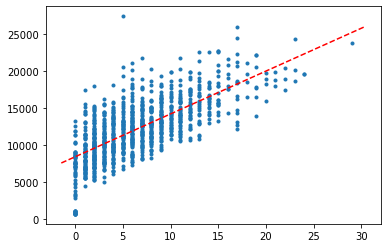

In [240]:

# plt.scatter(X_test['totminionskilled'][:samples], y_hat[:samples], label="1")

slope = clf.coef_[0]



plt.scatter(X_test['kills'], y_val, marker='.')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
# Z_vals = x_vals - x_vals.mean()
# Z_vals = Z_vals /Z_vals.std()
y_vals = intercept + slope* x_vals
print(y_vals.shape)
plt.plot(x_vals, y_vals, '--', color='r')
# plt.legend()

In [127]:
clf.predict(Z_test.values)

array([10925.92266091,  6562.40647091, 16044.08681573, ...,
       14522.82438083, 11463.62906991, 16627.55225482])

In [131]:
y_test.values

array([10305,  5968, 15112, ..., 14431, 11252, 16678], dtype=int64)

In [108]:
skf = StratifiedKFold(n_splits=, shuffle = True)
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    print('{}º fold'.format(fold))
    clf = LinearRegression()
    clf.fit(Z_train.values[train_index], y_train.values[train_index])
    print('aqui')
    y_val = y_train.values[val_index]
    y_hat = clf.predict(Z_train.values[val_index])
    # precision = (y_val == y_hat).mean()
    error_mean = ((y_val - y_hat)**2).mean()
    print('{} de erro'.format(error_mean))
    print('')
    print('')
    fold += 1

1º fold
aqui
4943109.02566222 de erro


2º fold
aqui
4886357.827338802 de erro


3º fold
aqui
4900008.575757057 de erro


4º fold
aqui
5148187.054215397 de erro


5º fold
aqui
5077476.855645815 de erro




In [75]:
y_train.size

40000

1- Estimar o gold do time de acordo com o número de objetivos, farm, kills feitos, além do tempo de partida.

2- Estimar a quantidade de kills, assistências e mortes de um campeão de acordo com gold recebido.

In [252]:
# Separating variables
# X = df[['kills', 'turretkills', 'totminionskilled', 'inhibkills', 'wardskilled']]
X = df[['goldspent']]
X
y = df['deaths']
y

0         10
1          2
2          8
3         11
4          8
          ..
999994     4
999995     6
999996     5
999997     6
999998     7
Name: deaths, Length: 999999, dtype: int64

In [253]:
samples = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:samples], y[:samples], test_size = 0.2)

In [254]:
# clf = LogisticRegression(random_state=0)
clf = LinearRegression()
clf.fit(X_train.values, y_train.values)
print('aqui')
y_val = y_test.values
y_hat = clf.predict(X_test.values)
# precision = (y_val == y_hat).mean()
error_mean = ((y_val - y_hat)**2).mean()
error_mean

aqui


10.021551507150997

In [255]:
intercept = clf.intercept_

(2,)


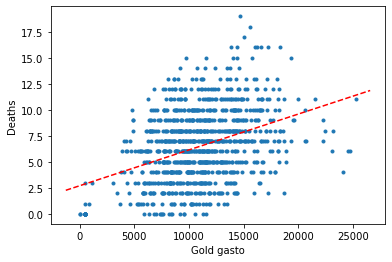

In [257]:

slope = clf.coef_[0]


plt.scatter(X_test['goldspent'], y_val, marker='.')
plt.xlabel('Gold gasto')
plt.ylabel('Deaths')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
# Z_vals = x_vals - x_vals.mean()
# Z_vals = Z_vals /Z_vals.std()
y_vals = intercept + slope* x_vals
print(y_vals.shape)
plt.plot(x_vals, y_vals, '--', color='r')
# plt.legend()

Classificação

In [53]:
# Análise da base
df = pd.read_csv('games.csv')
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [84]:
df['t1_champ3_sum2']

0         7
1         3
2         4
3         7
4         3
         ..
51485    14
51486     4
51487     4
51488    12
51489    12
Name: t1_champ3_sum2, Length: 51490, dtype: int64

In [ ]:
1 - Classificar entre vencedor baseado objetivos feitos.

In [66]:
# Separando dados
X_t1 = df[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 'gameDuration']].copy()
X_t1

X_t2 = df[['t2_towerKills', 't2_inhibitorKills', 't2_baronKills',
       't2_dragonKills', 't2_riftHeraldKills', 'gameDuration']].copy()
X_t2
y = df[['winner']] - 1

In [67]:
# from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_t1, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(41192, 6)
(10298, 6)


In [69]:
# Z-Normaliza os dados
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

Z_train = X_train.copy()
Z_train = X_train - mean_train
Z_train = Z_train/std_train
Z_train

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,gameDuration
5777,0.604223,-0.015299,1.069056,0.507178,1.727891,-0.978256
3326,1.130149,2.353842,1.069056,1.335621,1.727891,0.381198
28932,1.393112,1.564128,-0.639376,1.335621,1.727891,0.240968
40241,1.130149,0.774415,-0.639376,-0.321265,-0.578726,-0.043388
16695,-0.973553,-0.805012,-0.639376,-1.149708,-0.578726,-0.053126
...,...,...,...,...,...,...
18454,0.604223,-0.015299,1.069056,1.335621,-0.578726,0.229282
32886,-0.710591,-0.805012,-0.639376,-0.321265,-0.578726,0.443523
1856,-0.184665,-0.805012,-0.639376,0.507178,-0.578726,1.596527
38090,-1.499479,-0.805012,-0.639376,-1.149708,-0.578726,-1.190549


In [72]:
# Mais imports
from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_score

In [76]:
skf = StratifiedKFold(n_splits=5, shuffle = True)
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    print('{}º fold'.format(fold))
    for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Z_train.values[train_index], y_train.values[train_index])

        y_val = y_train.values[val_index]
        y_hat = model.predict(Z_train.values[val_index])

        precision = precision_score(y_val, y_hat)
        print('{} cluster(s) com {}% de precisão'.format(k, round(precision,3)*100))
    print('')
    print('')
    fold += 1

1º fold
1 clusters com 0.918 de precisão
3 clusters com 0.935 de precisão
5 clusters com 0.945 de precisão
7 clusters com 0.948 de precisão
9 clusters com 0.949 de precisão
11 clusters com 0.951 de precisão
13 clusters com 0.953 de precisão
15 clusters com 0.949 de precisão
17 clusters com 0.947 de precisão
19 clusters com 0.946 de precisão
21 clusters com 0.947 de precisão


2º fold
1 clusters com 0.907 de precisão
3 clusters com 0.928 de precisão
5 clusters com 0.937 de precisão
7 clusters com 0.94 de precisão
9 clusters com 0.944 de precisão
11 clusters com 0.946 de precisão
13 clusters com 0.947 de precisão
15 clusters com 0.944 de precisão
17 clusters com 0.95 de precisão
19 clusters com 0.948 de precisão
21 clusters com 0.951 de precisão


3º fold
1 clusters com 0.922 de precisão
3 clusters com 0.935 de precisão
5 clusters com 0.938 de precisão
7 clusters com 0.942 de precisão
9 clusters com 0.945 de precisão
11 clusters com 0.947 de precisão
13 clusters com 0.949 de precisão
15 

2 - Classificar entre vencedor ou não baseado nos bans dos campeões.

In [80]:
# Separando dados
X = df[['t2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5']].copy()
X
y = df[['winner']] - 1

In [81]:
# Separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(41192, 5)
(10298, 5)


In [82]:
skf = StratifiedKFold(n_splits=5, shuffle = True)
fold = 1
for train_index, val_index in skf.split(X_train, y_train):
    print('{}º fold'.format(fold))
    for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train.values[train_index], y_train.values[train_index])

        y_val = y_train.values[val_index]
        y_hat = model.predict(X_train.values[val_index])

        precision = precision_score(y_val, y_hat)
        print('{} cluster(s) com {}% de precisão'.format(k, round(precision,3)*100))
    print('')
    print('')
    fold += 1

1º fold
1 cluster(s) com 49.6% de precisão
3 cluster(s) com 50.0% de precisão
5 cluster(s) com 49.9% de precisão
7 cluster(s) com 50.1% de precisão
9 cluster(s) com 50.1% de precisão
11 cluster(s) com 50.4% de precisão
13 cluster(s) com 50.4% de precisão
15 cluster(s) com 50.2% de precisão
17 cluster(s) com 49.9% de precisão
19 cluster(s) com 50.1% de precisão
21 cluster(s) com 49.8% de precisão


2º fold
1 cluster(s) com 49.4% de precisão
3 cluster(s) com 49.5% de precisão
5 cluster(s) com 48.9% de precisão
7 cluster(s) com 49.9% de precisão
9 cluster(s) com 50.0% de precisão
11 cluster(s) com 49.9% de precisão
13 cluster(s) com 49.3% de precisão
15 cluster(s) com 49.0% de precisão
17 cluster(s) com 48.8% de precisão
19 cluster(s) com 49.0% de precisão
21 cluster(s) com 48.5% de precisão


3º fold
1 cluster(s) com 49.5% de precisão
3 cluster(s) com 49.2% de precisão
5 cluster(s) com 49.4% de precisão
7 cluster(s) com 49.8% de precisão
9 cluster(s) com 49.1% de precisão
11 cluster(s) c